In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime as datetime
 
df = pd.read_json('../data/database-27-10.json')

df = df.loc[(df['date'] > np.datetime64("2022-07-16"))]

TypeError: Invalid comparison between dtype=datetime64[ns, pytz.FixedOffset(120)] and datetime64

In [ ]:
topics = json.loads(open("topics.json", "r").read())

In [ ]:
df['tags_full'] = ['; '.join(tags) for tags in df['tags'].to_list()]

In [ ]:
for topic in topics:
    df.loc[(df.title.str.contains('|'.join(topics[topic]['keywords'])) | df.tags_full.str.contains('|'.join(topics[topic]['keywords']))), 'topic'] = topic

In [ ]:
df = df.loc[(df.topic == "Covid-19-Pandemie")]

In [131]:
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.weekofyear
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df = df.groupby(["month", "year"]).size().reset_index(name="amount")

df['date'] = df['month'].astype(str) + " " + df['year'].astype(str)

/var/folders/bc/qptbbs8s5qb7xdt31yl10bnm0000gn/T/ipykernel_8293/3583047747.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.weekofyear


In [ ]:
df.head()

,month,year,amount
0,5,2022,1
1,6,2022,1
2,7,2022,44
3,8,2022,64
4,9,2022,54


<AxesSubplot: xlabel='date'>

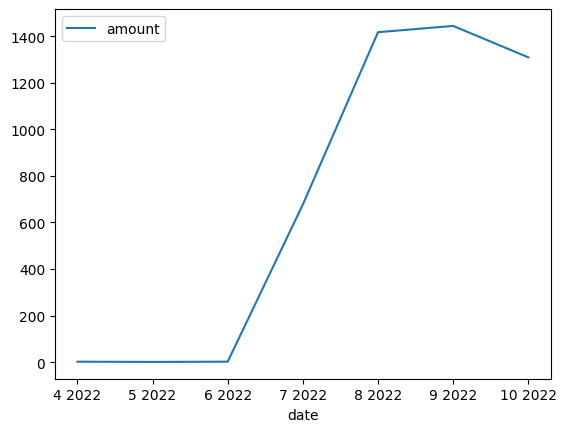

In [132]:
df.plot(kind="line", x="date", y="amount")

In [65]:
# groupby day
"""
df = (df.date.dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count')
       .sort_values('date'))
"""

In [67]:
df.head(20)

14    2022-07-17 00:00:00+02:00
15    2022-07-17 00:00:00+02:00
16    2022-07-17 00:00:00+02:00
17    2022-07-13 00:00:00+02:00
18    2022-05-05 00:00:00+02:00
19    2022-07-08 00:00:00+02:00
20    2022-06-09 00:00:00+02:00
27    2022-07-17 00:00:00+02:00
71    2022-07-19 00:00:00+02:00
72    2022-07-19 00:00:00+02:00
87    2022-07-19 00:00:00+02:00
103   2022-07-18 00:00:00+02:00
129   2022-07-18 00:00:00+02:00
165   2022-07-16 00:00:00+02:00
188   2022-07-20 00:00:00+02:00
236   2022-07-21 00:00:00+02:00
243   2022-07-21 00:00:00+02:00
248   2022-07-21 00:00:00+02:00
255   2022-07-21 00:00:00+02:00
302   2022-07-22 00:00:00+02:00
Name: date, dtype: datetime64[ns, pytz.FixedOffset(120)]

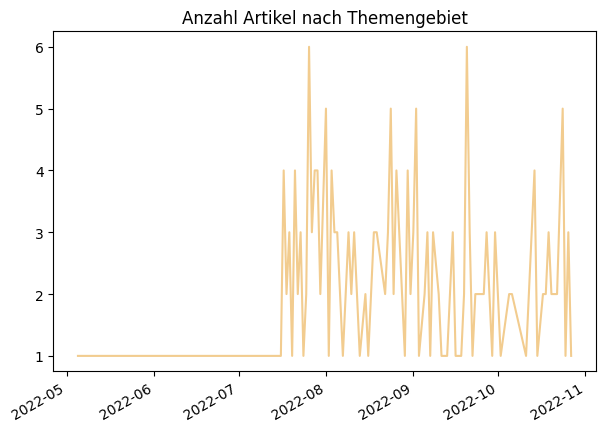

In [13]:


ax = df.plot(kind="line", x="date", y="count", figsize=(7,5), legend=False, rot=30, color="#f2cc8f", title="Anzahl Artikel nach Themengebiet")
ax.axes.get_xaxis().get_label().set_visible(False)

ax.get_figure().savefig('bar-topic.png', bbox_inches="tight")